In [1]:
using Revise

In [2]:
using MeshCat
using MeshCatMechanisms
using RigidBodyDynamics
using JuMP
using Gurobi
using JLD2
using Flux
using MLDataPattern
using ProgressMeter
using Plots; gr()

Plots.GRBackend()

In [3]:
import LCPSim
import BoxValkyries
import FluxExtensions

In [4]:
robot = BoxValkyries.BoxValkyrie()
mvis = MechanismVisualizer(robot)
IJuliaCell(mvis)

Listening on 127.0.0.1:7000...
zmq_url=tcp://127.0.0.1:6000
web_url=http://127.0.0.1:7000/static/


MeshCat.IJuliaCell(MeshCat.ViewerWindow(ZMQ.Context(Ptr{Void} @0x0000000007cc9be0, ZMQ.Socket[ZMQ.Socket(Ptr{Void} @0x0000000007d033a0, Base.Filesystem._FDWatcher(Ptr{Void} @0x0000000007d5a950, 55, (1, 0), Condition(Any[]), (false, false), 0))]), ZMQ.Socket(Ptr{Void} @0x0000000007d033a0, Base.Filesystem._FDWatcher(Ptr{Void} @0x0000000007d5a950, 55, (1, 0), Condition(Any[]), (false, false), 0)), "http://127.0.0.1:7000/static/", "tcp://127.0.0.1:6000", MeshCat.ZMQServer.ZMQWebSocketBridge(ip"127.0.0.1", Set{WebSockets.WebSocket}(), MeshCat.SceneTrees.SceneNode(Nullable{Array{UInt8,1}}(), Nullable{Array{UInt8,1}}(), Dict("meshcat"=>MeshCat.SceneTrees.SceneNode(#NULL, #NULL, Dict("robot"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x72, 0x6f, 0x62, 0x6f, 0x74], Dict("world"=>MeshCat.SceneTrees.SceneNode(#NULL, #NULL, Dict("dummy"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6f, 0x72, 0x6c, 0x64, 0x2f, 0x64, 0x75, 0x6d, 0x6d, 0x79], Dict("base"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x64, 0x75, 0x6d, 0x6d, 0x79, 0x2f, 0x62, 0x61, 0x73, 0x65], Dict("base_revolute"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x65, 0x5f, 0x72, 0x65, 0x76, 0x6f, 0x6c, 0x75, 0x74, 0x65], Dict("core"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6f, 0x6c, 0x75, 0x74, 0x65, 0x2f, 0x63, 0x6f, 0x72, 0x65], Dict("rh_dummy"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x65, 0x2f, 0x72, 0x68, 0x5f, 0x64, 0x75, 0x6d, 0x6d, 0x79], Dict("after_core_to_rh_rotation"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x5f, 0x72, 0x6f, 0x74, 0x61, 0x74, 0x69, 0x6f, 0x6e], Dict("geometry_2"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], Dict{String,MeshCat.SceneTrees.SceneNode}()))),"rh"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x5f, 0x64, 0x75, 0x6d, 0x6d, 0x79, 0x2f, 0x72, 0x68], Dict("after_core_to_rh_extension"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x5f, 0x65, 0x78, 0x74, 0x65, 0x6e, 0x73, 0x69, 0x6f, 0x6e], Dict("geometry_3"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x33], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x33], Dict{String,MeshCat.SceneTrees.SceneNode}()))))))),"rf_dummy"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x65, 0x2f, 0x72, 0x66, 0x5f, 0x64, 0x75, 0x6d, 0x6d, 0x79], Dict("after_core_to_rf_rotation"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x66, 0x5f, 0x72, 0x6f, 0x74, 0x61, 0x74, 0x69, 0x6f, 0x6e], Dict("geometry_6"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x36], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x36], Dict{String,MeshCat.SceneTrees.SceneNode}()))),"rf"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x66, 0x5f, 0x64, 0x75, 0x6d, 0x6d, 0x79, 0

In [5]:
function create_net()
    net = Chain(
        Dense(22, 64, elu),
        Dense(64, 64, elu),
        Dense(64, 1)
    )
    loss = (x, lb, ub) -> begin
        y = net(x)
        sum(ifelse.(y .< lb, lb .- y, ifelse.(y .> ub, y .- ub, 0 .* y)))
    end
    net, loss
end

features(s::LearningMPC.Sample) = (s.state, s.mip.objective_bound, s.mip.objective_value)

features (generic function with 1 method)

In [8]:
xstar = BoxValkyries.nominal_state(robot)
mpc_params = LearningMPC.MPCParams(
    Δt=0.05,
    horizon=10,
    mip_solver=GurobiSolver(Gurobi.Env(), OutputFlag=0, 
        TimeLimit=5,
        FeasibilityTol=1e-3),
    lcp_solver=GurobiSolver(Gurobi.Env(), OutputFlag=0))

Q, R = BoxValkyries.default_costs(robot)
feet = findbody.(robot.mechanism, ["lf", "rf"])
lqrsol = LearningMPC.LQRSolution(xstar, Q, R, mpc_params.Δt, Point3D.(default_frame.(feet), 0., 0., 0.))
# lqrsol.S .= 1 ./ mpc_params.Δt .* Q

net, loss = create_net()
tangent_net = FluxExtensions.TangentPropagator(net)
net_params = params(net)
optimizer = Flux.Optimise.ADAM(net_params)

net_qp_controller = let x_net = MechanismState(robot.mechanism)
    function (state)
        set_configuration!(x_net, configuration(state))
        set_velocity!(x_net, velocity(state))
        value, jac = tangent_net(Vector(state))
        m = Model(solver=mpc_params.mip_solver)
        _, results = LCPSim.optimize(x_net, robot.environment, mpc_params.Δt, 1, m)
        @assert length(results) == 1
        x = results[1].state.state
        u = results[1].input
        q = vec(Flux.Tracker.data(jac))
        @objective m Min u' * lqrsol.R * u + x' * lqrsol.Q * x + q' * x
        solve(m)
        getvalue(results[1].input)
    end
end

mpc_controller = LearningMPC.MPCController(robot.mechanism, 
    robot.environment, mpc_params, lqrsol, 
    [lqrsol, net_qp_controller]);

sample_sink = LearningMPC.MPCSampleSink{Float64}(true)
playback_sink = LearningMPC.PlaybackSink(mvis, mpc_params.Δt)

mpc_controller.callback = LearningMPC.call_each(
    sample_sink,
    playback_sink,
)

live_viewer = LearningMPC.live_viewer(mvis)

termination = x -> begin
    (configuration(x)[2] < 0.5 || 
     configuration(x)[3] > π/4 ||
     configuration(x)[3] < -π/4)
end

dagger_controller = LearningMPC.call_each(
    LearningMPC.dagger_controller(
        mpc_controller,
        net_qp_controller,
        0.2),
    live_viewer
    )

dataset = LearningMPC.Dataset(lqrsol)

x_init = BoxValkyries.nominal_state(robot)
x0 = MechanismState{Float64}(robot.mechanism)

function collect_into!(data::Vector{<:LearningMPC.Sample})
    empty!(sample_sink)
    LearningMPC.randomize!(x0, x_init, 0.0, 1.5)
    results = LCPSim.simulate(x0, 
        dagger_controller,
        robot.environment, mpc_params.Δt, 50, 
        mpc_params.lcp_solver;
        termination=termination);
    append!(data, sample_sink.samples)
end


Academic license - for non-commercial use only
Academic license - for non-commercial use only


collect_into! (generic function with 1 method)

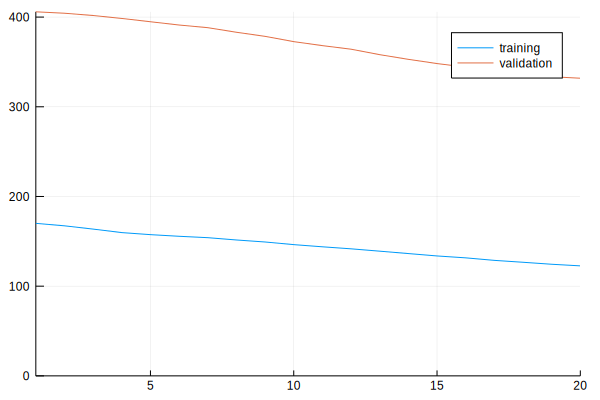

  2.699974 seconds (1.26 M allocations: 68.739 MiB, 1.62% gc time)


Progress:   1%|                                         |  ETA: 7:47:58

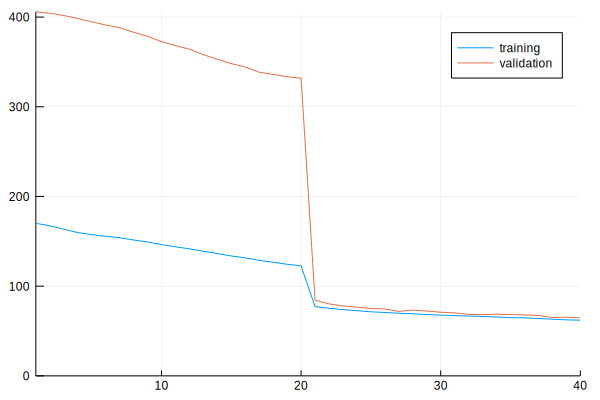

  0.426224 seconds (420.56 k allocations: 36.786 MiB, 1.97% gc time)


Progress:   2%|█                                        |  ETA: 8:08:34

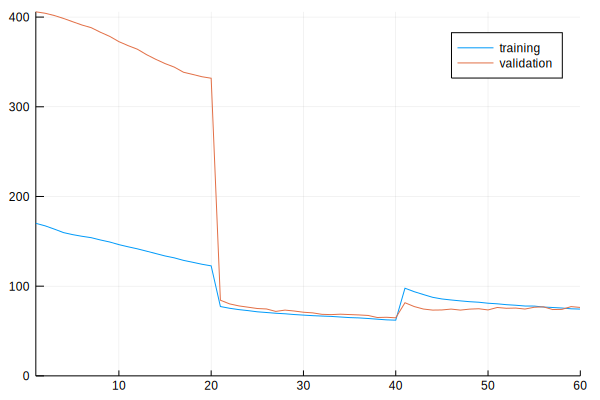

  0.713232 seconds (639.08 k allocations: 56.033 MiB, 3.48% gc time)


Progress:   3%|█                                        |  ETA: 8:00:31

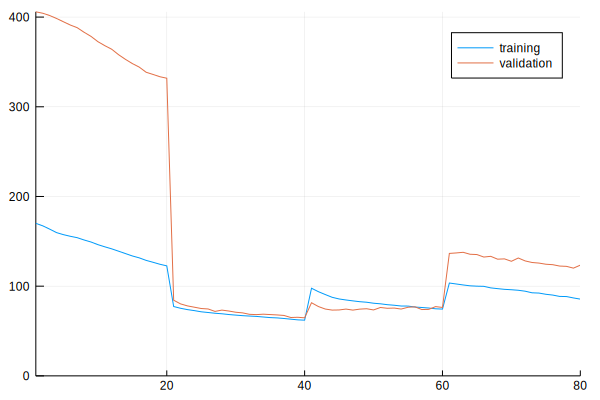

  1.618121 seconds (814.14 k allocations: 71.289 MiB, 21.38% gc time)


Progress:   4%|██                                       |  ETA: 7:29:59

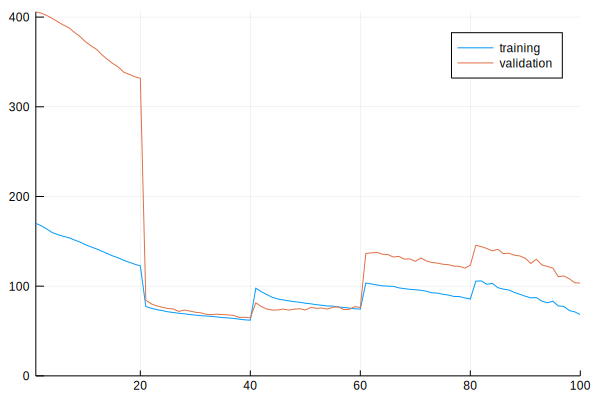

  0.945508 seconds (865.28 k allocations: 76.024 MiB, 2.63% gc time)


Progress:   5%|██                                       |  ETA: 6:56:59

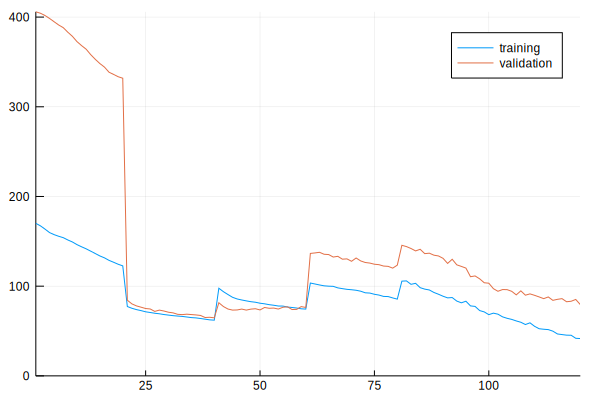

  1.115597 seconds (1.06 M allocations: 93.224 MiB, 3.71% gc time)


Progress:   6%|██                                       |  ETA: 6:44:50

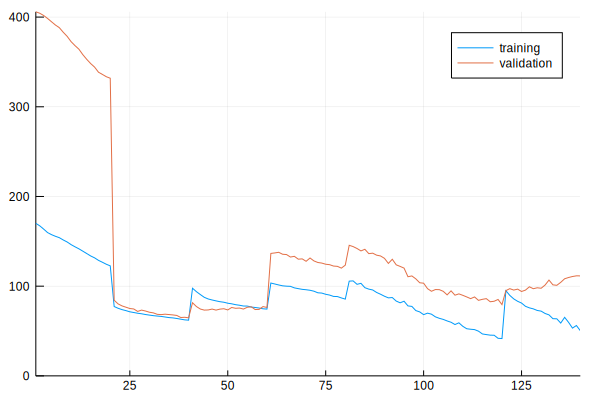

  1.518021 seconds (1.24 M allocations: 109.365 MiB, 2.74% gc time)


Progress:   7%|███                                      |  ETA: 6:37:04

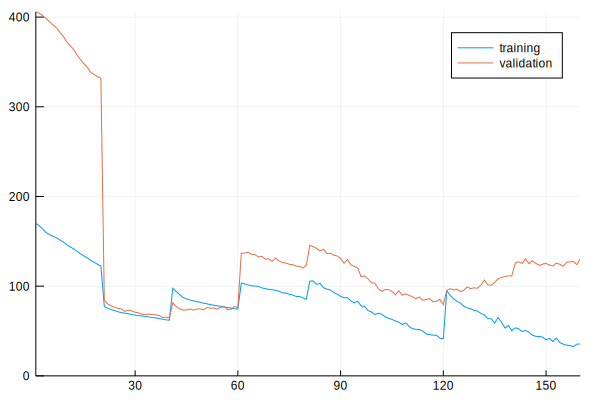

  1.814020 seconds (1.34 M allocations: 118.004 MiB, 2.40% gc time)


Progress:   8%|███                                      |  ETA: 6:20:03

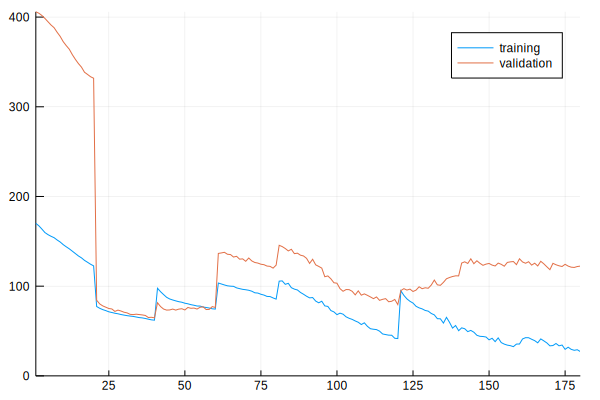

  1.554352 seconds (1.43 M allocations: 125.445 MiB, 3.04% gc time)


Progress:   9%|████                                     |  ETA: 5:58:17

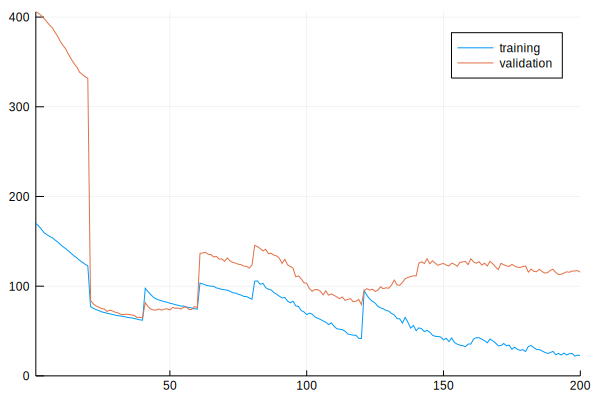

  1.759483 seconds (1.52 M allocations: 134.319 MiB, 2.82% gc time)


Progress:  10%|████                                     |  ETA: 5:45:38

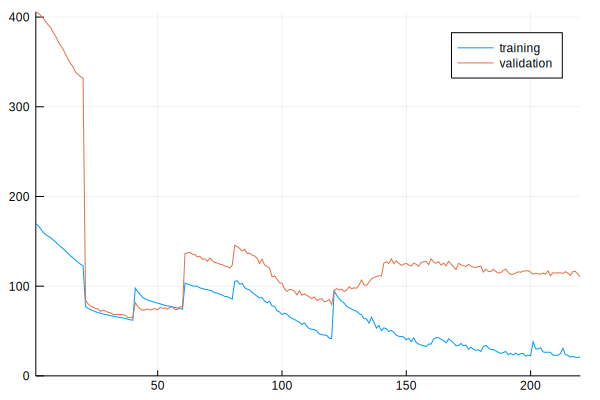

  1.849101 seconds (1.69 M allocations: 149.432 MiB, 2.98% gc time)


Progress:  11%|█████                                    |  ETA: 5:44:10

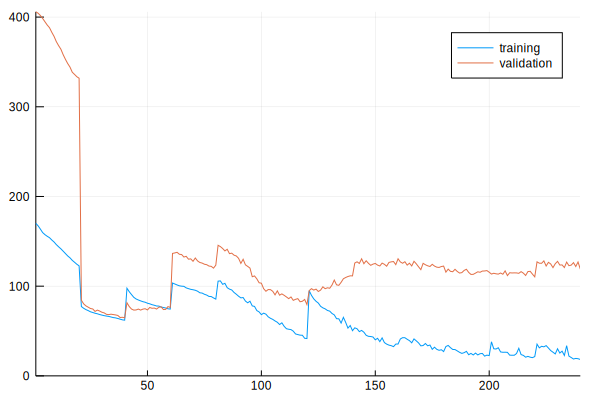

  1.937969 seconds (1.80 M allocations: 158.871 MiB, 3.28% gc time)


Progress:  12%|█████                                    |  ETA: 5:38:25

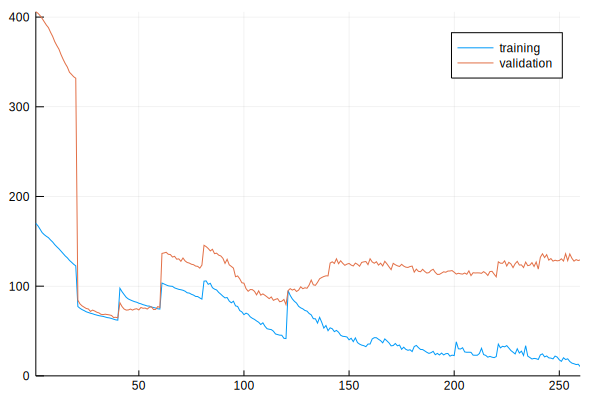

  2.021372 seconds (1.97 M allocations: 173.706 MiB, 3.00% gc time)


Progress:  13%|█████                                    |  ETA: 5:35:47

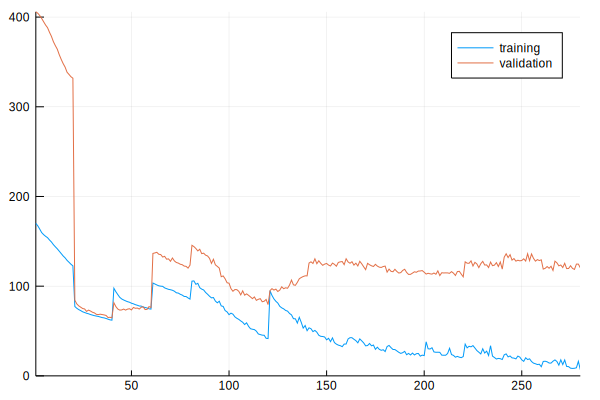

  2.149148 seconds (2.19 M allocations: 193.551 MiB, 3.10% gc time)


Progress:  14%|██████                                   |  ETA: 5:45:24

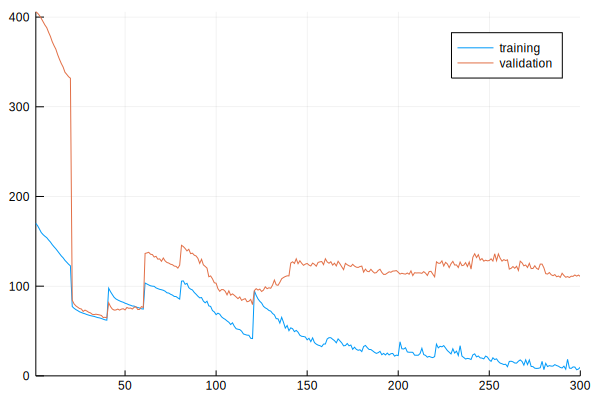

  2.378555 seconds (2.36 M allocations: 208.098 MiB, 2.78% gc time)


Progress:  15%|██████                                   |  ETA: 5:41:48

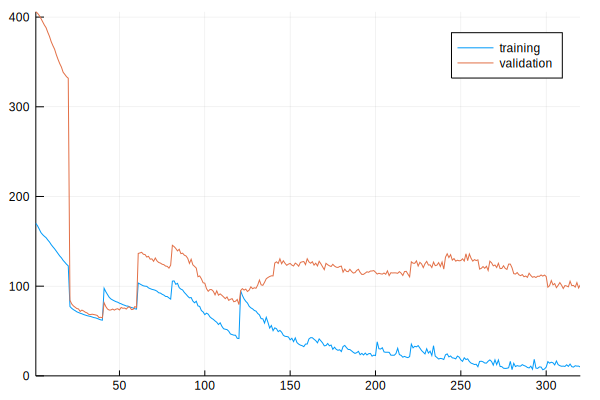

  2.585737 seconds (2.56 M allocations: 226.181 MiB, 3.17% gc time)


Progress:  16%|███████                                  |  ETA: 5:43:24

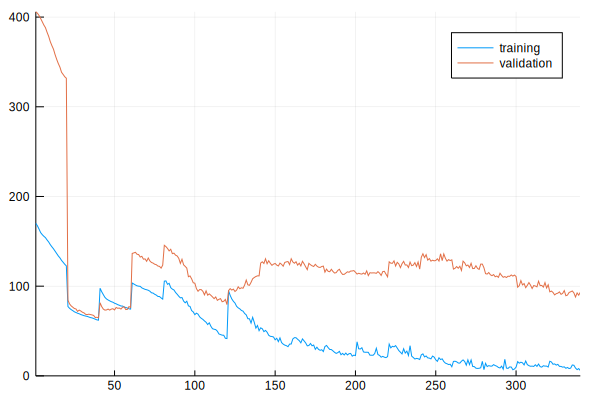

  3.175341 seconds (2.78 M allocations: 245.432 MiB, 10.59% gc time)


Progress:  17%|███████                                  |  ETA: 5:44:29

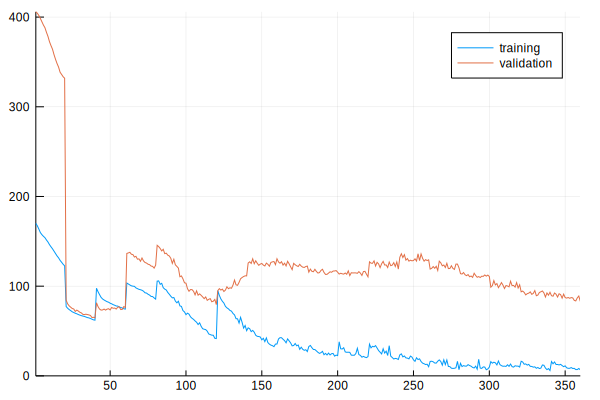

  3.920269 seconds (3.13 M allocations: 276.395 MiB, 2.73% gc time)


Progress:  18%|███████                                  |  ETA: 5:57:12

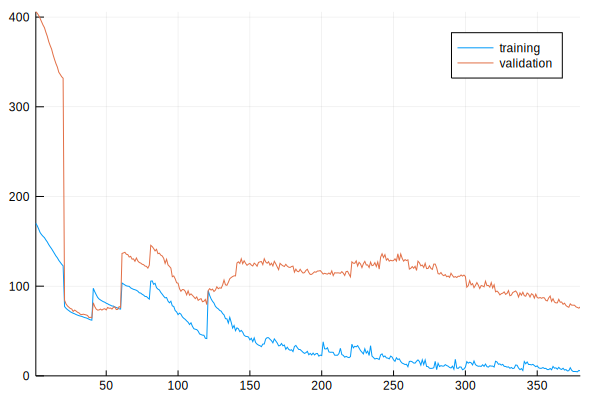

  3.342753 seconds (3.25 M allocations: 286.717 MiB, 2.87% gc time)


Progress:  19%|████████                                 |  ETA: 5:43:55

captured: ErrorException("Unrecognized solution status: loaded")


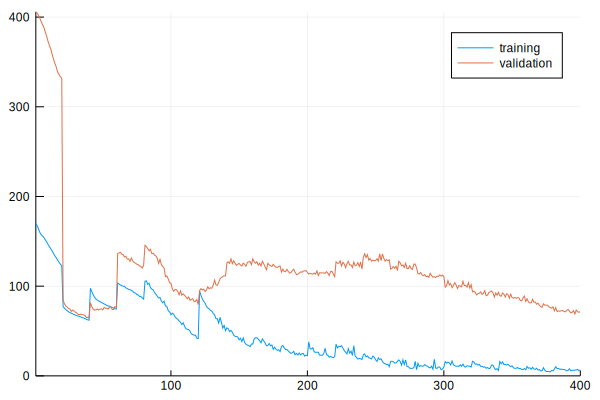

  4.355810 seconds (3.40 M allocations: 299.690 MiB, 2.74% gc time)


Progress:  20%|████████                                 |  ETA: 5:36:57

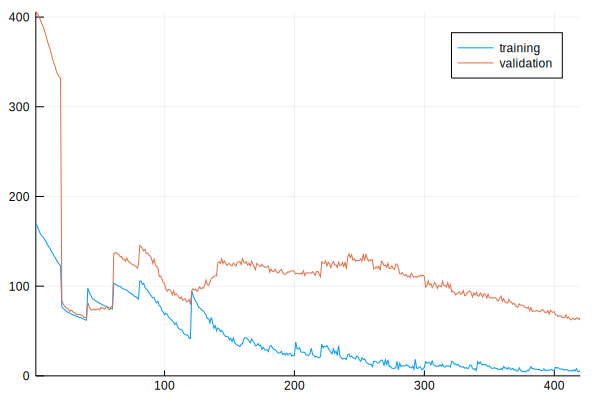

  3.795215 seconds (3.66 M allocations: 323.445 MiB, 2.93% gc time)


Progress:  21%|█████████                                |  ETA: 5:41:56

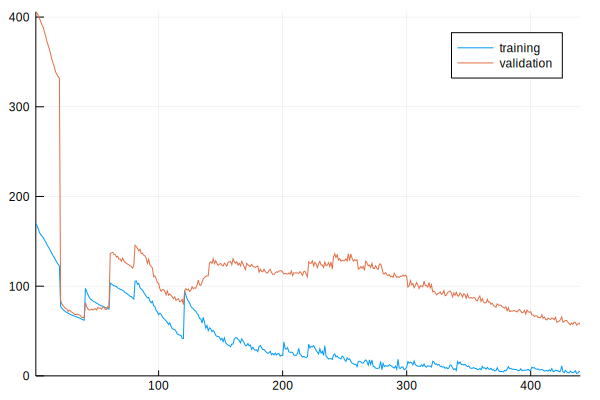

  4.039918 seconds (3.86 M allocations: 341.067 MiB, 2.89% gc time)


Progress:  22%|█████████                                |  ETA: 5:37:30

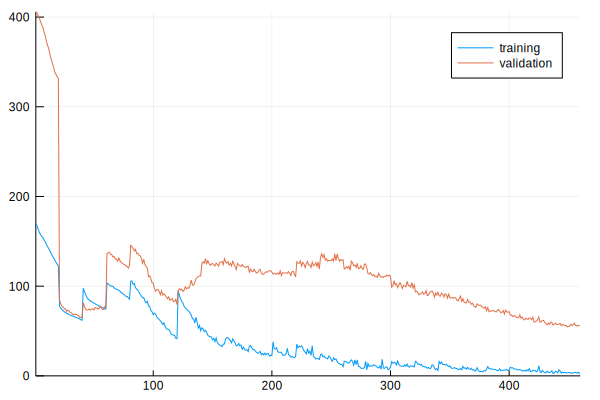

  3.885023 seconds (3.90 M allocations: 344.090 MiB, 3.01% gc time)


Progress:  23%|█████████                                |  ETA: 5:26:52

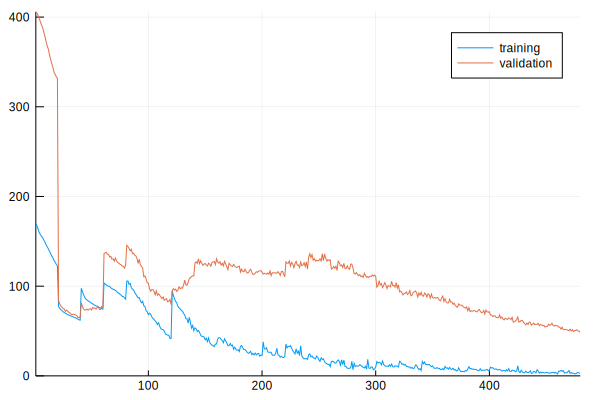

  4.450548 seconds (4.16 M allocations: 367.154 MiB, 2.89% gc time)


Progress:  24%|██████████                               |  ETA: 5:24:06

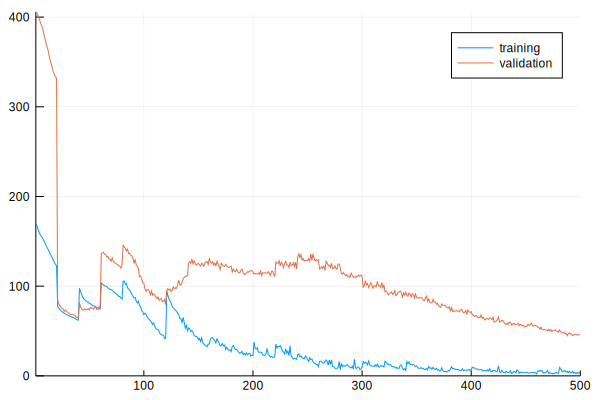

  4.415343 seconds (4.35 M allocations: 383.431 MiB, 3.05% gc time)


Progress:  25%|██████████                               |  ETA: 5:19:09

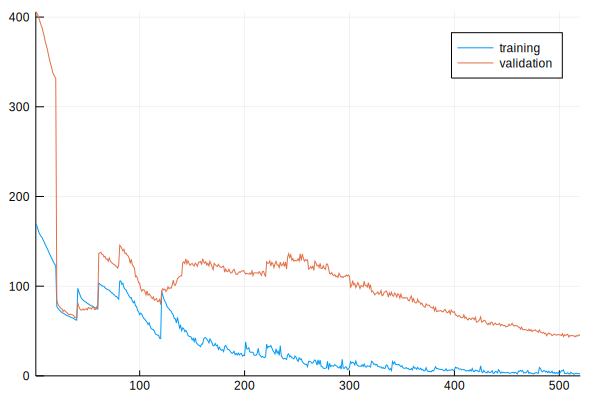

  5.605055 seconds (4.58 M allocations: 403.489 MiB, 2.57% gc time)


Progress:  26%|███████████                              |  ETA: 5:17:23

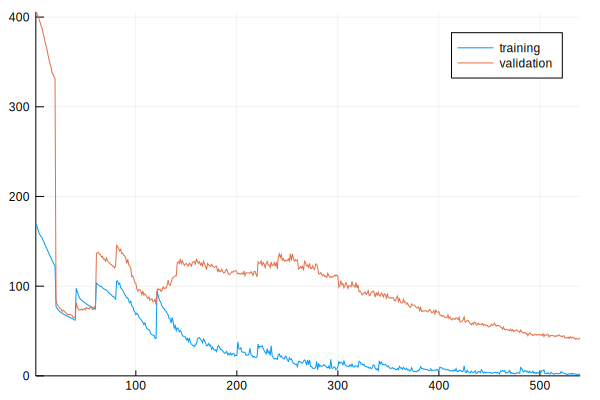

  4.836693 seconds (4.77 M allocations: 420.442 MiB, 2.84% gc time)


Progress:  27%|███████████                              |  ETA: 5:11:15

In [ ]:
datasets = Vector{LearningMPC.Dataset{Float64}}()
all_training_data = Vector{Tuple{Vector{Float64}, Float64, Float64}}()
all_validation_data = Vector{Tuple{Vector{Float64}, Float64, Float64}}()
losses = Vector{Tuple{Float64, Float64}}()

@showprogress for i in 1:100
    dataset = LearningMPC.Dataset(lqrsol)
    for i in 1:2
        collect_into!(dataset.training_data)
    end
    collect_into!(dataset.testing_data)
    collect_into!(dataset.validation_data)
    append!(all_training_data, features.(dataset.training_data))
    append!(all_validation_data, features.(dataset.validation_data))
    
    @time for i in 1:20
        Flux.train!(loss, shuffleobs(all_training_data), optimizer)
        push!(losses, 
            (mean(xy -> Flux.Tracker.data(loss(xy...)), 
                  all_training_data),
             mean(xy -> Flux.Tracker.data(loss(xy...)), 
                  all_validation_data)))
    end
    push!(datasets, dataset)
    
    jldopen("box-atlas-value-interval.jld2", "w") do file
        file["datasets"] = datasets
        file["net"] = net
        file["lqrsol"] = lqrsol
        file["mpc_params"] = Dict(
            "Δt" => mpc_params.Δt,
            "horizon" => mpc_params.horizon,
        )
        file["all_training_data"] = all_training_data
        file["all_validation_data"] = all_validation_data
        file["losses"] = losses
    end
    
    plt = plot(first.(losses), label="training")
    plot!(plt, last.(losses), label="validation")
    ylims!(plt, (0, ylims(plt)[2]))
    display(plt)
end